In [1]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import phik
from pylab import rcParams

rcParams['figure.figsize'] = 25, 15

# для построения моделей воспользуемся sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import umap
from tqdm import tqdm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import plotly.graph_objs as go
import itertools
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

%matplotlib inline

In [ ]:
'''
Тут будут графики
'''

# Функции для визуализации графиков
# VVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVV

In [3]:
# функция для выводя двумерных графиков без кластеризации
def make_2D_plot(dataframe,  plot_name='*******', xaxis=0, yaxis=1):
    sns.set(rc={"figure.figsize":( 15, 8 )})
    fig = sns.scatterplot(x=dataframe[:,xaxis], y=dataframe[:,yaxis]).set(title=plot_name)
    return fig

In [5]:
def make_2D_plot_hierarhical(dataframe, n=2, plot_name='******', link='ward'):

    agg = AgglomerativeClustering(n_clusters=n, linkage=link).fit(dataframe)
    labels = agg.labels_

    plt.figure(figsize=(15, 8))

    plt.scatter(dataframe[:,0], dataframe[:,1], c=labels, s=20, cmap='coolwarm')

    plt.title(plot_name)
    plt.xlabel('Количество кластеров')
    plt.ylabel('Коэффициент K-means')

    return plt.show()

In [6]:
def make_dendro(dataframe, method='ward'):
    plt.figure(figsize=(20, 10))

    selected_data = dataframe
    clusters = shc.linkage(selected_data,
                           method=method,
                           metric="euclidean"
                           )

    shc.dendrogram(Z=clusters)
    plt.title(f'Customers Dendrogram metod == {method}')
    plt.show()

    return plt.show()

In [7]:
# функция реализации DBSCAN

def make_DBSCAN_2D(dataframe, epsilon=0.5, min_sam=5):
    dbscan = DBSCAN(eps = epsilon, min_samples = min_sam).fit(dataframe)
    db_labels = dbscan.labels_
    plt.scatter(dataframe[:,0], dataframe[:,1], c=db_labels)

    return plt.show()

In [44]:
# функция для выводя трёхмерных графиков без кластеризации
def Data_Color(i):

    if (i == -1):
        return "white"

    elif (i == 1):
        return "red"
    elif (i == 0):
        return "blue"

    else:
        return 'violet'

def make_3D_plot(dataframe, plot_name='"red == Anomaly; blue == Normal "'):

    data = dataframe
    fig = go.Scatter3d(x=data.iloc[:, 0],
                       y=data.iloc[:, 1],
                       z=data.iloc[:, 2],
                       marker=dict(opacity=0.9,
                                   reversescale=True,
                                   color=list(map(Data_Color, dataframe['class'])),
                                   size=4
                                   ),
                       line=dict (width=0.02),
                       mode='markers',

                       )

    layout = go.Layout(scene=dict(  xaxis=dict( title="data[0]"),
                                    yaxis=dict( title="data[1]"),
                                    zaxis=dict(title="data[2]")),
                       title=plot_name
                       )

    fig = go.Figure(data=fig, layout=layout)
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    return fig.show()

# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# Функции для визуализации графиков

In [3]:
# Функция для преобразования РСА
def make_PCA(dataframe):
    converter_pca = PCA(n_components=2, random_state=42)
    return converter_pca.fit_transform(dataframe)

In [12]:
# Функция для преобразования UMAP
def make_UMAP(dataframe, n=2):
    converter_umap = umap.UMAP(n_components=n,random_state=42)
    return converter_umap.fit_transform(dataframe)

In [22]:
# Функция для преобразования tSNE
def make_TSNE(dataframe, n=2):
    tsne = TSNE(n_components=n, random_state=42, n_jobs=-1)
    return tsne.fit_transform(dataframe)

In [5]:
# Функция для скалирования и инвертирования
def make_scale(dataframe, inv=0):
    scaler = StandardScaler()
    scaled = scaler.fit_transform(dataframe)
    if inv == 0:
        return scaled
    elif inv == 1:
        inversed = scaler.inverse_transform(scaled)
        return inversed

In [41]:
high_corr = ['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V18', 'V1', 'V9'] # самые скорелированные фичи

In [7]:
outlaw_full_prune =  pd.read_csv('outlaw_full_prune.csv') #оригинальный не скалированный дадтафрейм со всеми фмчами, но количество строк 10500, есть колонка Class

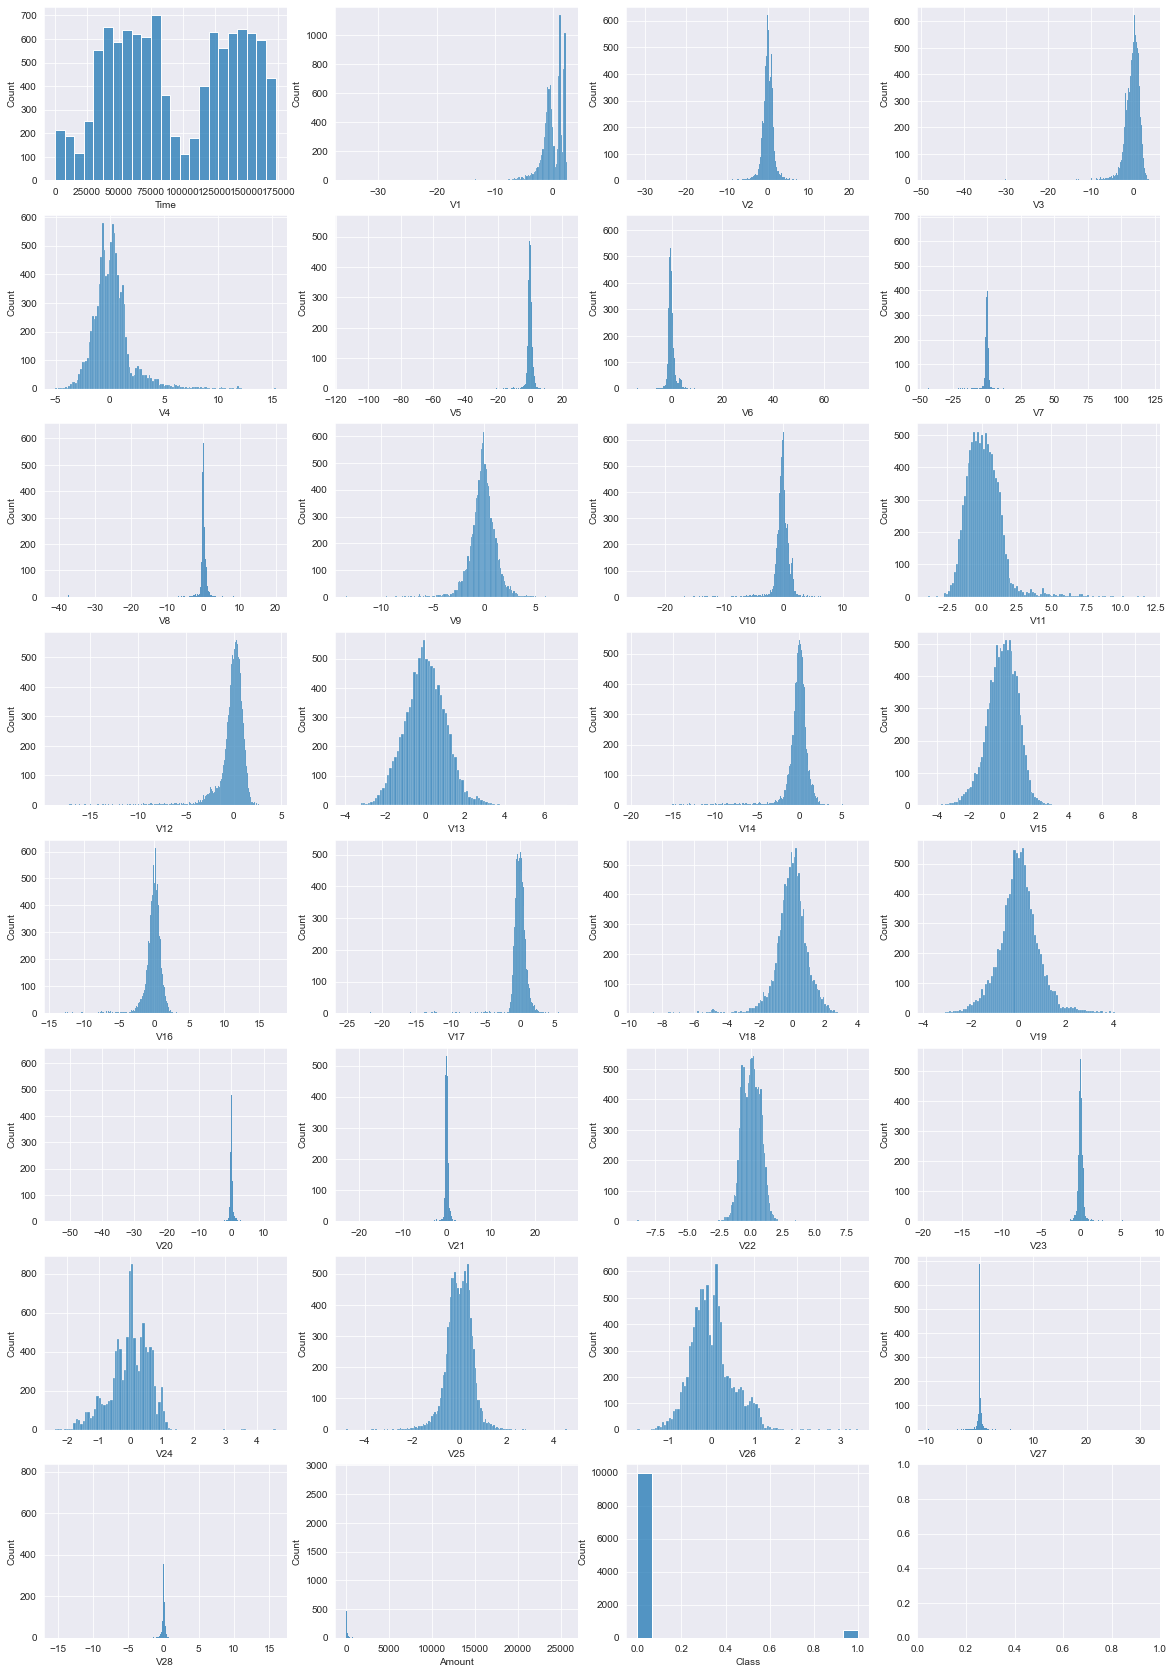

In [40]:
# Вывод гистограмм
fig, axes = plt.subplots(8, 4, figsize=(20, 30))
for ax, column in zip(axes.flat, outlaw_full_prune.columns):
    sns.histplot(outlaw_full_prune.sample(n=10492, random_state=42)[column], ax=ax)

plt.show()

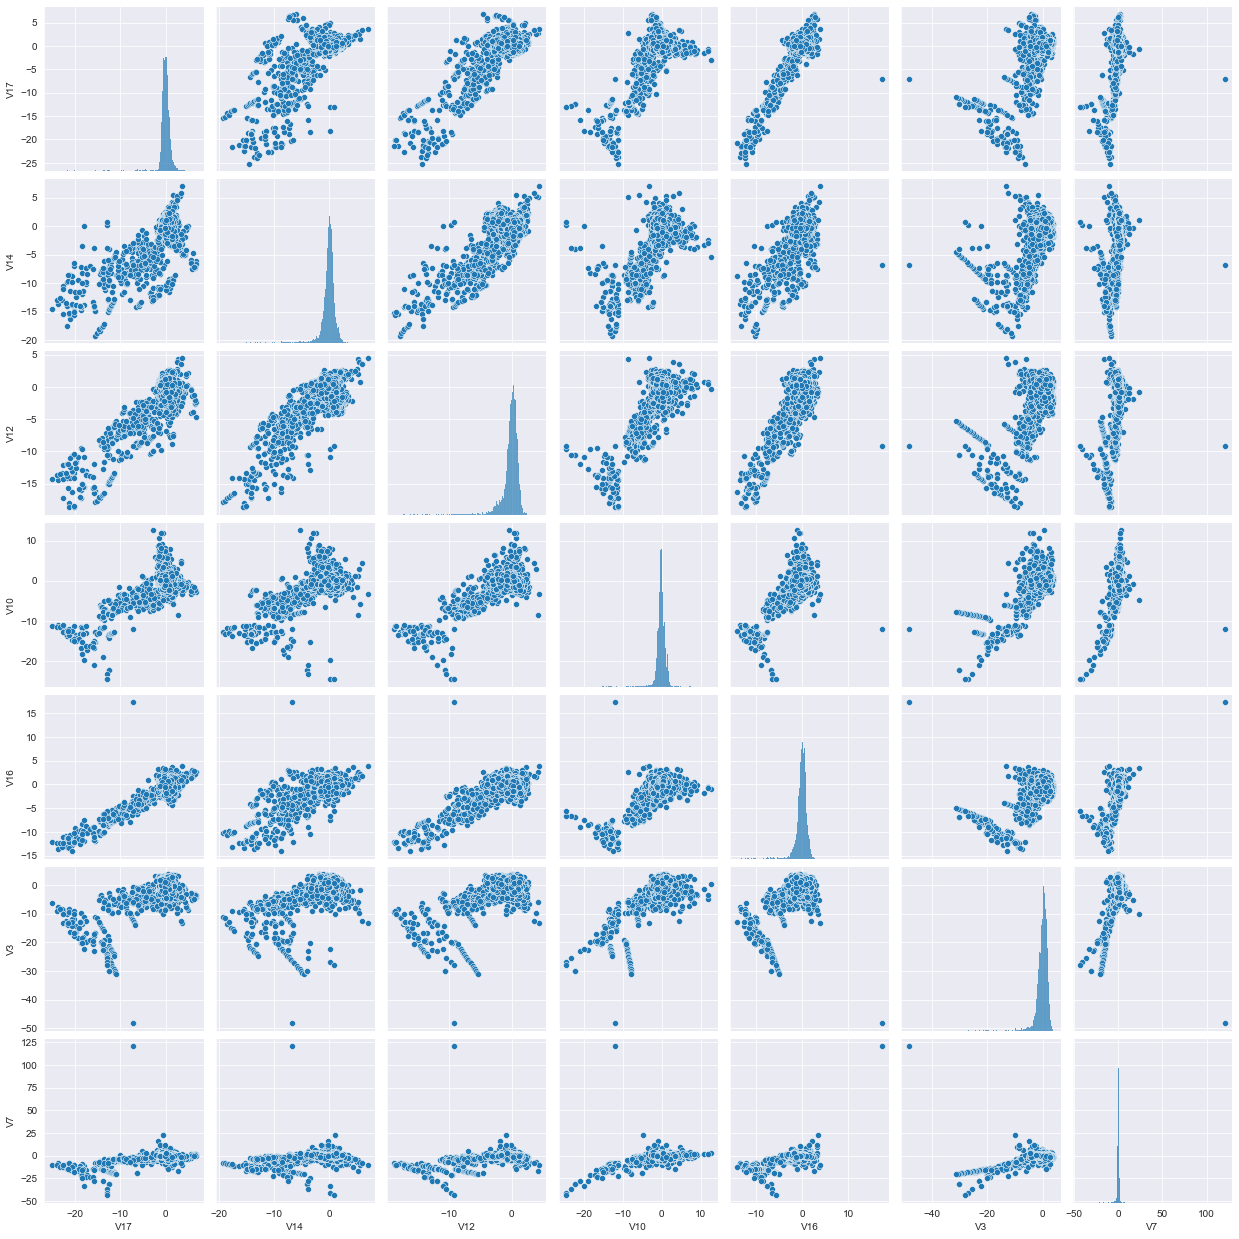

In [42]:
sns.pairplot(outlaw_full_prune[high_corr[:7]])

In [45]:
make_3D_plot(df_outlaw_full_prune_no_Class_scale_pca)

NameError: name 'df_outlaw_full_prune_no_Class_scale_pca' is not defined

In [21]:
make_3D_plot(df_outlaw_full_prune_no_Class_scale_UMAP)

In [22]:
make_3D_plot(df_outlaw_full_prune_no_Class_scale_TSNE)

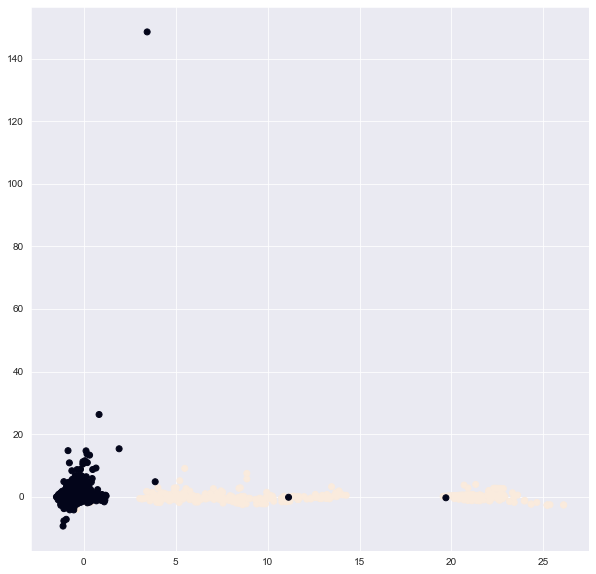

In [12]:
plt.figure(figsize=(10, 10))
plt.scatter(df_outlaw_full_prune_no_Class_scale_pca_2[0], df_outlaw_full_prune_no_Class_scale_pca_2[1], c=df_outlaw_full_prune_no_Class_scale_pca_2["class"])

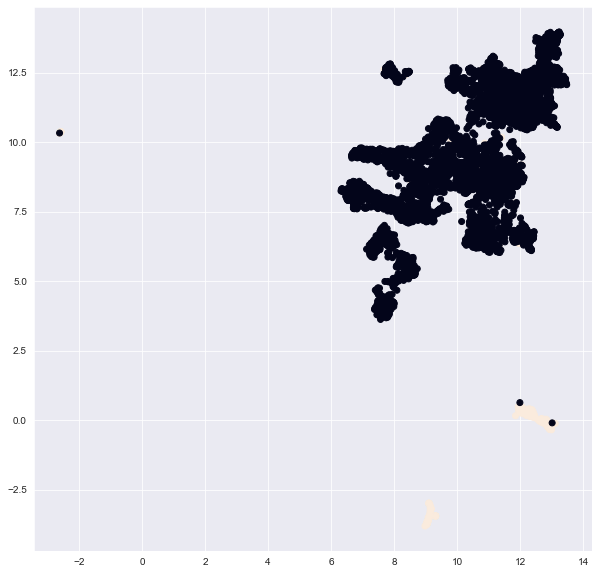

In [33]:
plt.figure(figsize=(10, 10))
plt.scatter(df_outlaw_full_prune_no_Class_scale_UMAP_2[0], df_outlaw_full_prune_no_Class_scale_UMAP_2[1], c=df_outlaw_full_prune_no_Class_scale_UMAP_2["class"])

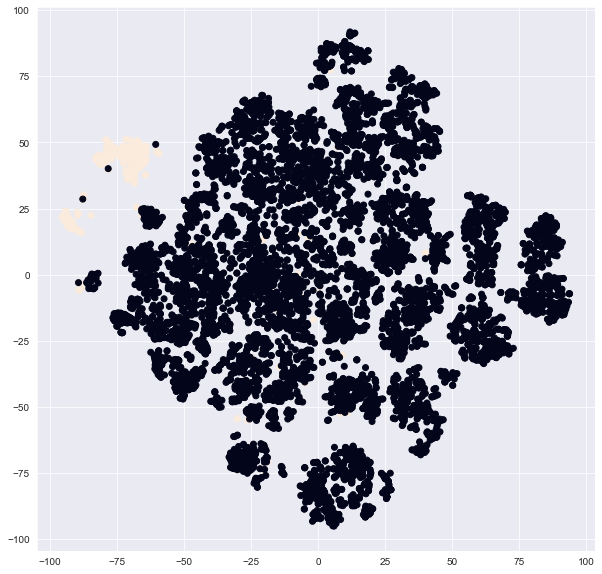

In [28]:
plt.figure(figsize=(10, 10))
plt.scatter(df_outlaw_full_prune_no_Class_scale_TSNE_2[0], df_outlaw_full_prune_no_Class_scale_TSNE_2[1], c=df_outlaw_full_prune_no_Class_scale_TSNE_2["class"])

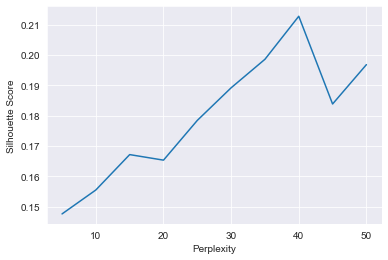

In [30]:
# найдем оптимальное значение для параметра perplexity
perplexities = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

silhouette_scores = []

for p in perplexities:
    tsne = TSNE(perplexity=p)
    X_transformed = tsne.fit_transform(outlaw_full_prune_no_Class_scale)
    score = silhouette_score(X_transformed, outlaw_full_prune["Class"])
    silhouette_scores.append(score)

plt.plot(perplexities, silhouette_scores)
plt.xlabel('Perplexity')
plt.ylabel('Silhouette Score')
plt.show()

In [32]:
# Функция для преобразования TSNE c лучшим параметром perplexity
def make_TSNE_tuned(dataframe, n=2):
    tsne = TSNE(n_components=n, perplexity=40,random_state=42, n_jobs=-1)
    return tsne.fit_transform(dataframe)

In [33]:
outlaw_full_prune_no_Class_scale_TSNE_2_tuned = make_TSNE_tuned(outlaw_full_prune_no_Class_scale)
df_outlaw_full_prune_no_Class_scale_TSNE_2_tuned= pd.DataFrame(outlaw_full_prune_no_Class_scale_TSNE_2_tuned)
df_outlaw_full_prune_no_Class_scale_TSNE_2_tuned["class"] = outlaw_full_prune["Class"]

In [34]:
df_outlaw_full_prune_no_Class_scale_TSNE_2_tuned.to_csv('df_outlaw_full_prune_no_Class_scale_TSNE_2_tuned.csv', index=False)

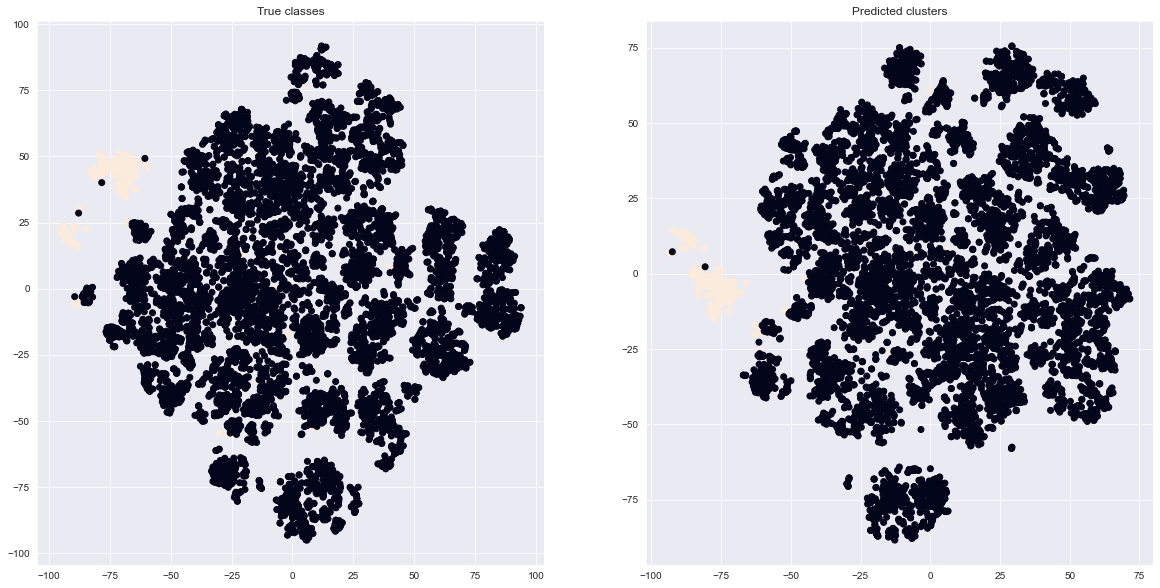

In [39]:
# Сравним на графике TSNE с perplexity со значением по умолчанию и TSNE оптимизированную методом силуэта

def plot_results(true, predicted):
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    ax[0].scatter(true[0], true[1], c=true['class'])
    ax[0].set_title("True classes")
    ax[1].scatter(predicted[0], predicted[1], c=predicted['class'])
    ax[1].set_title("Predicted clusters")
    plt.show()


plot_results(df_outlaw_full_prune_no_Class_scale_TSNE_2, df_outlaw_full_prune_no_Class_scale_TSNE_2_tuned)